## 제6장. 머신러닝
## 제2절. 다항 회귀

### 1. scikit-learn의 PolynomialFeatures
* 코드 실습1

In [24]:
import pandas as pd
cereal = pd.read_csv('C:/adp/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [25]:
cereal = cereal[cereal.columns[3:]]
cereal =cereal[cereal.sugars >=0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

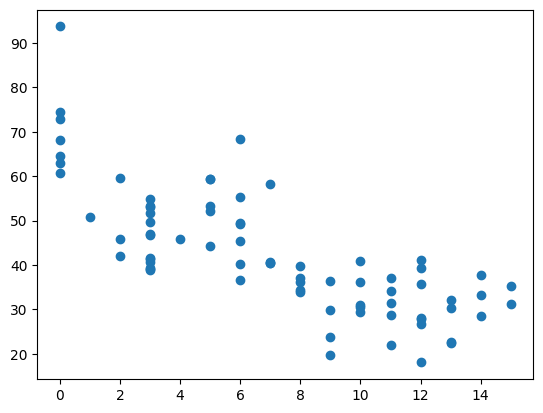

In [26]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 2023)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [29]:
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[42.66 36.52]
 [68.67 64.53]
 [53.97 41.5 ]
 [42.66 40.11]
 [53.97 41.45]
 [53.97 38.84]
 [68.67 63.01]
 [29.   33.17]
 [39.64 58.35]
 [68.67 68.24]
 [58.5  45.86]
 [30.16 26.73]
 [30.16 27.75]
 [42.66 49.51]
 [53.97 39.24]
 [30.16 41.02]
 [30.16 35.78]
 [30.16 39.26]
 [36.99 37.04]
 [46.05 44.33]
 [30.16 28.03]
 [58.5  59.64]
 [36.99 34.38]]


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	73.536
MAE	6.748
RMSE	8.575
ACC	46.28%


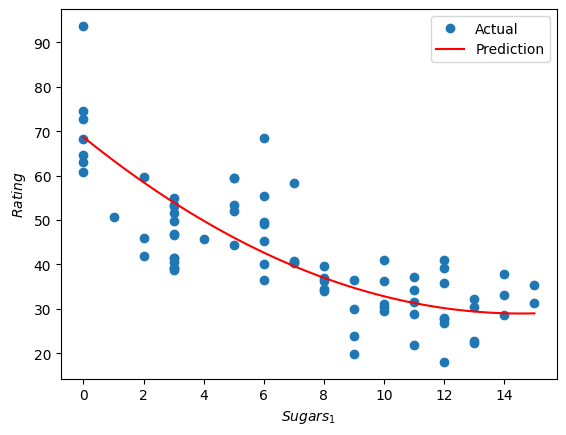

In [31]:
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

In [40]:
X_new

array([[ 0.  ],
       [ 0.15],
       [ 0.3 ],
       [ 0.45],
       [ 0.61],
       [ 0.76],
       [ 0.91],
       [ 1.06],
       [ 1.21],
       [ 1.36],
       [ 1.52],
       [ 1.67],
       [ 1.82],
       [ 1.97],
       [ 2.12],
       [ 2.27],
       [ 2.42],
       [ 2.58],
       [ 2.73],
       [ 2.88],
       [ 3.03],
       [ 3.18],
       [ 3.33],
       [ 3.48],
       [ 3.64],
       [ 3.79],
       [ 3.94],
       [ 4.09],
       [ 4.24],
       [ 4.39],
       [ 4.55],
       [ 4.7 ],
       [ 4.85],
       [ 5.  ],
       [ 5.15],
       [ 5.3 ],
       [ 5.45],
       [ 5.61],
       [ 5.76],
       [ 5.91],
       [ 6.06],
       [ 6.21],
       [ 6.36],
       [ 6.52],
       [ 6.67],
       [ 6.82],
       [ 6.97],
       [ 7.12],
       [ 7.27],
       [ 7.42],
       [ 7.58],
       [ 7.73],
       [ 7.88],
       [ 8.03],
       [ 8.18],
       [ 8.33],
       [ 8.48],
       [ 8.64],
       [ 8.79],
       [ 8.94],
       [ 9.09],
       [ 9.24],
       [

* 코드 실습2 : 고차 다항 회귀분석

In [35]:
X = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 2023)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [37]:
import numpy as np
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	10.171
MAE	1.869
RMSE	3.189
ACC	96.141%


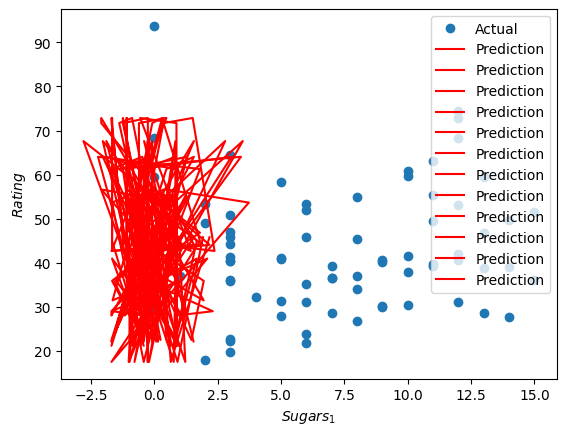

In [41]:
# 안됨 ㅠㅠ
# # X_new=np.linspace(0,15,100).reshape(100,1)
# # X_new_poly=poly_reg.transform(X_new)
# # y_new = reg.predict(X_new_poly)

# plt.plot(x,y, 'o', label ='Actual')
# plt.plot(X_test, pred, 'r-', label ='Prediction')
# plt.legend(loc='upper right')
# plt.xlabel('$Sugars_1$')
# plt.ylabel('$Rating$')
# plt.show()

In [39]:
X_new

array([[ 0.  ],
       [ 0.15],
       [ 0.3 ],
       [ 0.45],
       [ 0.61],
       [ 0.76],
       [ 0.91],
       [ 1.06],
       [ 1.21],
       [ 1.36],
       [ 1.52],
       [ 1.67],
       [ 1.82],
       [ 1.97],
       [ 2.12],
       [ 2.27],
       [ 2.42],
       [ 2.58],
       [ 2.73],
       [ 2.88],
       [ 3.03],
       [ 3.18],
       [ 3.33],
       [ 3.48],
       [ 3.64],
       [ 3.79],
       [ 3.94],
       [ 4.09],
       [ 4.24],
       [ 4.39],
       [ 4.55],
       [ 4.7 ],
       [ 4.85],
       [ 5.  ],
       [ 5.15],
       [ 5.3 ],
       [ 5.45],
       [ 5.61],
       [ 5.76],
       [ 5.91],
       [ 6.06],
       [ 6.21],
       [ 6.36],
       [ 6.52],
       [ 6.67],
       [ 6.82],
       [ 6.97],
       [ 7.12],
       [ 7.27],
       [ 7.42],
       [ 7.58],
       [ 7.73],
       [ 7.88],
       [ 8.03],
       [ 8.18],
       [ 8.33],
       [ 8.48],
       [ 8.64],
       [ 8.79],
       [ 8.94],
       [ 9.09],
       [ 9.24],
       [